In [ ]:
from PIL import Image
import numpy as np

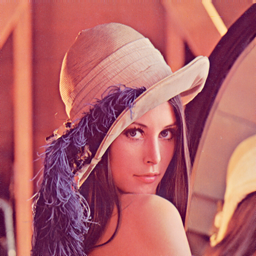

In [2]:
img = Image.open("Lenna.bmp")
img

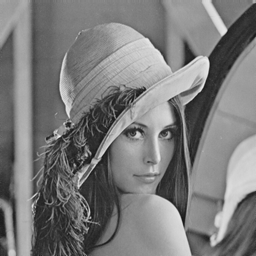

In [3]:
gray_img = img.convert('L')
gray_img

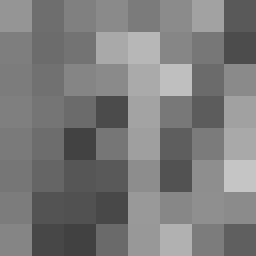

In [4]:
small_gray_img = gray_img.resize([8, 8], Image.ANTIALIAS)
small_gray_img.resize([256, 256])

In [5]:
mean_gray_val = np.mean(np.asarray(small_gray_img).flatten())
mean_gray_val

123.640625

In [6]:
tester = lambda p: 1 if p > mean_gray_val else 0
vfunc = np.vectorize(tester)
phash_array = vfunc(small_gray_img)
phash_array

array([[1, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 0]])

In [7]:
def to_hex(hash_array):
    hex_str = ''
    for array in hash_array:
        hash_val = int("".join(str(val) for val in array), 2)
        hex_str += hex(hash_val)[2:].rjust(2, '0')
    return hex_str

In [8]:
to_hex(phash_array)

'b69cbd89090b8f8e'

In [9]:
def ahash(path): 
    img = Image.open(path)
    gray_img = img.convert('L')
    small_gray_img = gray_img.resize([8, 8], Image.ANTIALIAS)
    mean_gray_val = np.mean(np.asarray(small_gray_img).flatten())
    
    tester = lambda p: 1 if p > mean_gray_val else 0
    vfunc = np.vectorize(tester)
    return vfunc(small_gray_img)

In [10]:
to_hex(ahash("Lenna.bmp"))

'b69cbd89090b8f8e'

In [11]:
to_hex(ahash("Lenna2.bmp"))

'b69c3d89090b0f8e'

In [12]:
to_hex(ahash("Parrots.bmp"))

'080cccee3c3c3e0e'